In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from get_data import *
from os import mkdir
from scipy.stats import linregress

In [2]:
%matplotlib inline

In [3]:
matplotlib.rc('font', family='serif') 

In [4]:
def draw_rectangle(x, y, w, h, **kwargs):
    plt.gca().add_patch(
            patches.Rectangle(
                (x, y),
                w,
                h,
                **kwargs
            )
        )

In [5]:
def draw_district(*args):
    draw_rectangle(*args, fill=True, color="black", alpha=0.05)
    draw_rectangle(*args, fill=False)

In [6]:
def dotgrid(xrange, yrange, **kwargs):
    yrange = list(yrange)
    xs, ys = [], []
    for x in xrange:
        for y in yrange:
            xs.append(x)
            ys.append(y)
    plt.scatter(xs, ys, **kwargs)

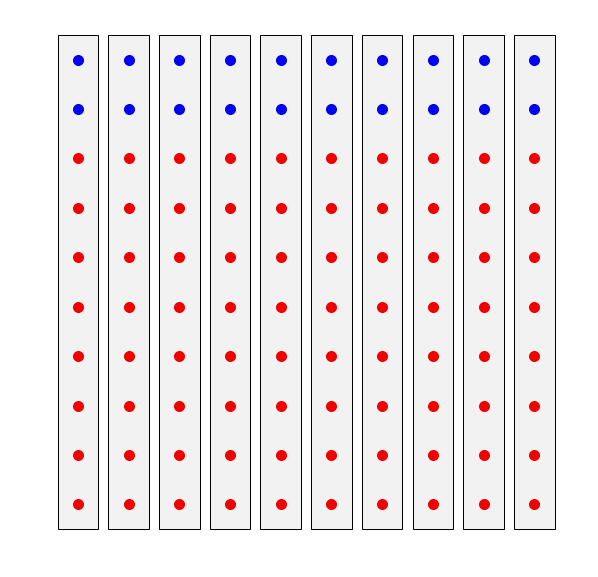

In [7]:
plt.figure(figsize=(10, 10))
for idx in range(10):
    draw_district(idx - 0.4, -0.5, 0.8, 10)
dotgrid(range(10), range(8), color="red", s=100)
dotgrid(range(10), range(8, 10), color="blue", s=100)
plt.axis('off')
plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.savefig("img/red_state.png", bbox_inches='tight')

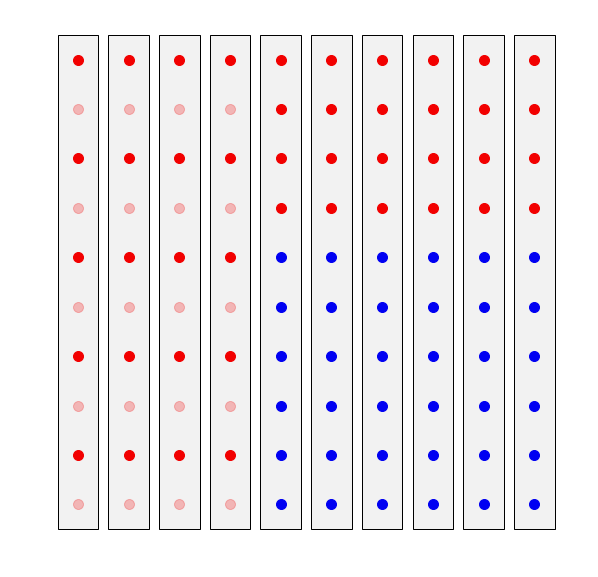

In [8]:
plt.figure(figsize=(10, 10))
for idx in range(10):
    draw_district(idx - 0.4, -0.5, 0.8, 10)
dotgrid(range(4), range(0, 10, 2), s=100, color="red", alpha=0.25)
dotgrid(range(4), range(1, 10, 2), s=100, color="red")
dotgrid(range(4, 10), range(6), s=100, color="blue")
dotgrid(range(4, 10), range(6, 10), s=100, color="red")
plt.axis('off')
plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.savefig("img/blue_state.png", bbox_inches='tight')

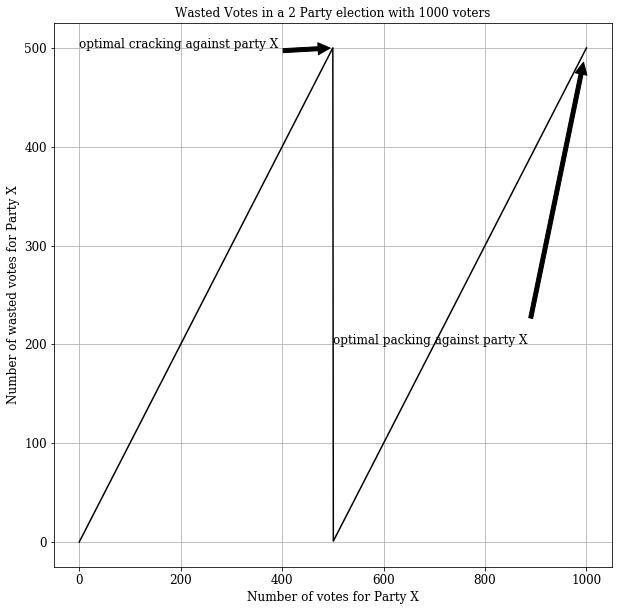

In [9]:
plt.figure(figsize=(10, 10))
nvotes = np.arange(0, 1001)
wasted = (nvotes > 500) * (nvotes - 500) + (nvotes <= 500) * nvotes
plt.plot(nvotes, wasted, color="black")
plt.xlabel("Number of votes for Party X")
plt.ylabel("Number of wasted votes for Party X")
for a, b, c in [(500, 500), (0, 500), "cracking"], [(1000, 500), (500, 200), "packing"]:
    plt.annotate('optimal %s against party X' % c,
                xy=a, xytext=b, arrowprops=dict(facecolor='black', shrink=0.05),
                size=12)
plt.grid()
plt.title("Wasted Votes in a 2 Party election with 1000 voters")
increase_size(plt.gca(), 12)
plt.savefig("img/wasted_votes.png")
plt.show()

In [10]:
columns = ["Efficiency Gap [%]", "Efficiency Percentage Gap [%]", "Effectiveness Gap [%]", "Weighted Effectiveness Gap [%]", "Democratic Vote Share [%]"]

In [11]:
gaps = get_columns(efficiency_gap, efficiency_percentage_gap, effectiveness_gap, weighted_effectiveness_gap, democratic_totals)
totals = get_columns(number_votes)
democratic_perc = gaps[:,4]

In [15]:
def scatterplot(x, y, path=None, ms=[1], y_axes=[0],
                draw_linear_regressor=False, new_figure=True, include_colormap=True):
    if new_figure:
        plt.figure(figsize=(20, 20))
    xs = gaps[:,x] * 100
    ys = gaps[:,y] * 100
    nonnan = list(np.where(1 - np.isnan(xs + ys))[0])
    xs, ys = xs[nonnan], ys[nonnan]
    if x == 0:
        plt.axvspan(-7, 7, alpha=0.1)
    import matplotlib.colors as mcolors
    rvb = mcolors.LinearSegmentedColormap.from_list("politics", ((1, 0, 0), (0, 0, 1)))
    plt.scatter(xs, ys, s=totals / np.mean(totals) * 500,
                c=democratic_perc[nonnan] * 100, cmap=rvb, alpha=0.75, vmin=25, vmax=75)
    if include_colormap:
        cbar = plt.colorbar(aspect=50)
        cbar.set_label('Democratic Vote Percentage', size=18)
        cbar.ax.tick_params(labelsize=18)
    plt.grid()
    for y_val in y_axes:
        plt.axvline(y_val, linestyle="-.", color="black")
    plt.axhline(0, linestyle="-.", color="black")
    plt.xlabel(columns[x])
    plt.ylabel(columns[y])
    for i, txt in enumerate(np.array(STATE_ABBR)[nonnan]):
        if not np.isnan(xs[i] + ys[i]):
            plt.annotate(txt, (xs[i],ys[i]))
    for m in ms:
        add_identity(plt.gca(), color="black", ls="-.", m=m, label="y=%sx" % ("" if m == 1 else str(m)))
    increase_size(plt.gca(), 24)
    if draw_linear_regressor:
        
        result = linregress(xs, ys)
        add_identity(plt.gca(),
                     m=result.slope, b=result.intercept,
                     color="black",
                     label="y=%.2fx %s %.2f [r=%.4f]" % (
                         result.slope,
                         "-+"[result.intercept >= 0],
                         abs(result.intercept),
                         result.rvalue))
    plt.legend(fontsize=24)
    plt.axis('equal')
    try:
        mkdir("img")
    except FileExistsError:
        pass
    if path is not None:
        plt.savefig(path)

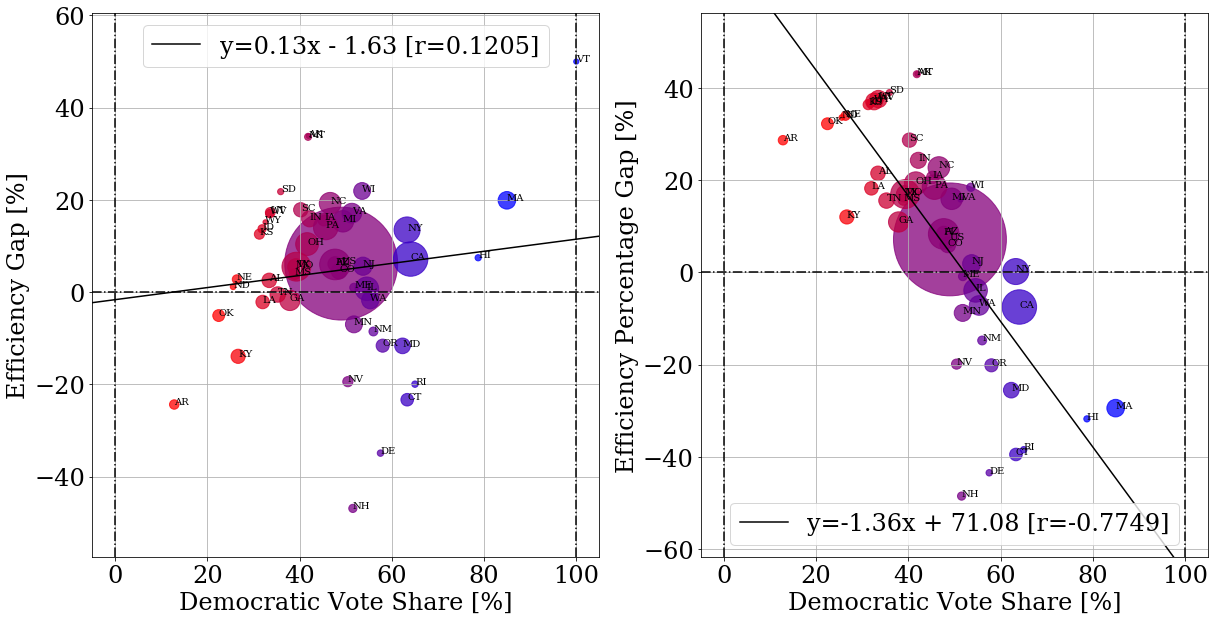

In [18]:
plt.figure(figsize=(20, 10))
for v in range(2):
    plt.subplot(121 + v)
    scatterplot(4, v, ms=[], y_axes=[0, 100],
                draw_linear_regressor=True, new_figure=False, include_colormap=False)
plt.savefig("img/party_affil_vs_effics.png")

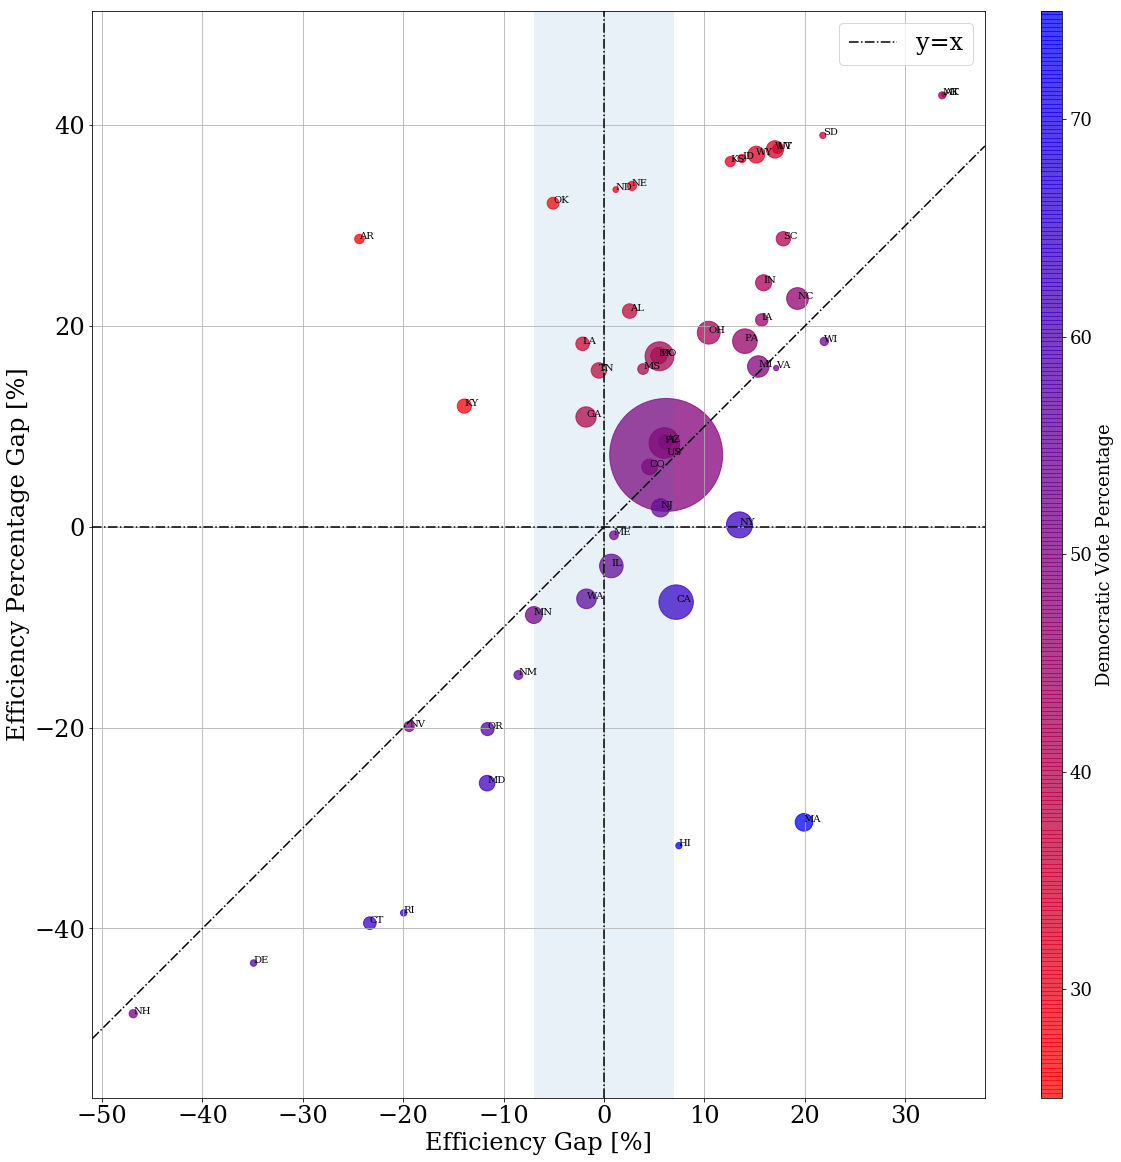

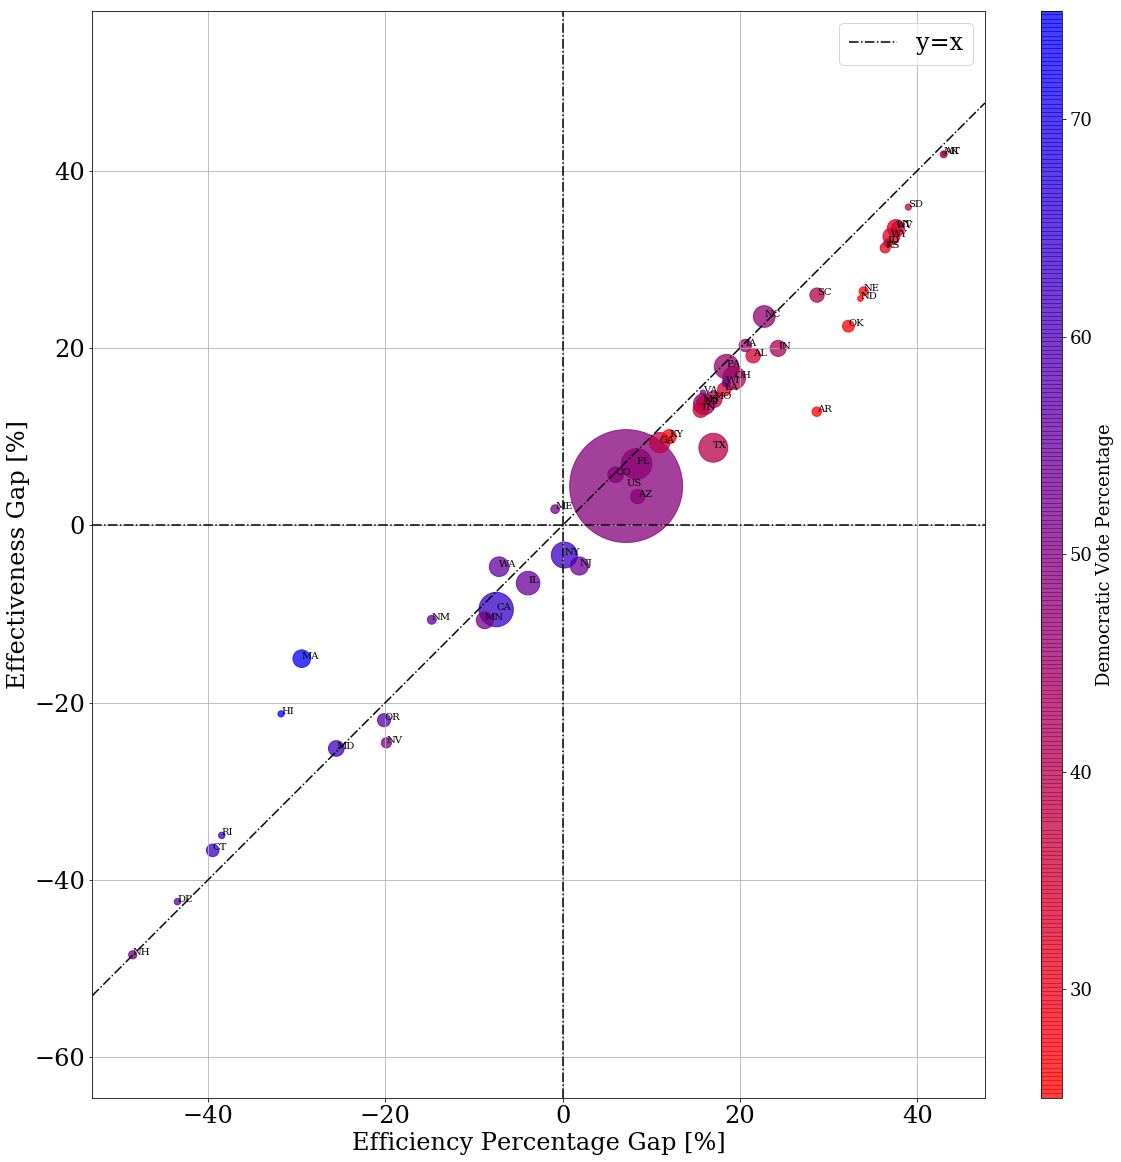

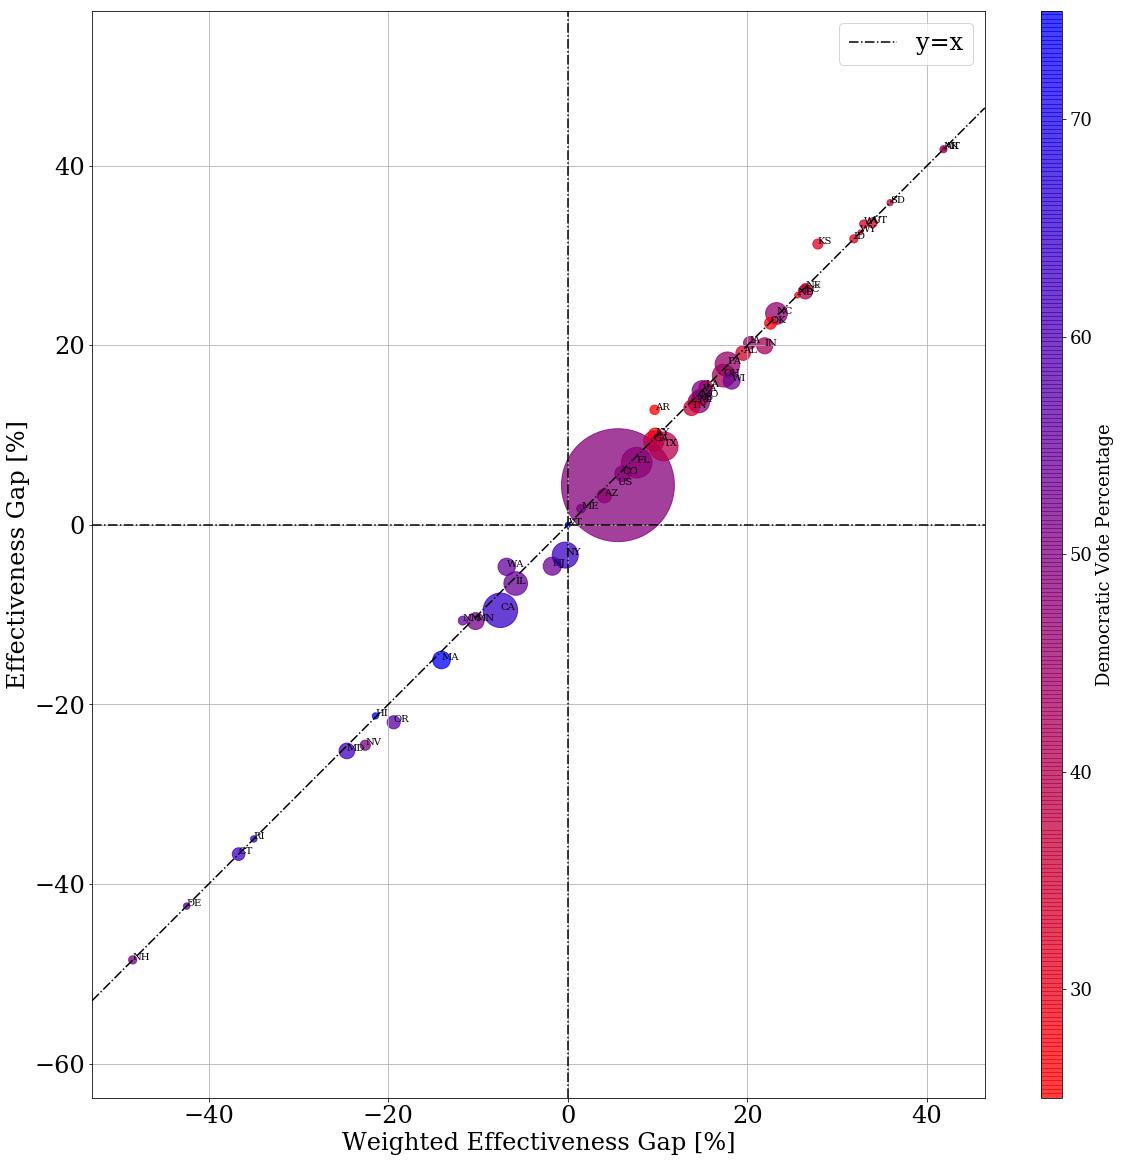

In [14]:
scatterplot(0, 1, "img/effic_vs_effic_perc.png")
scatterplot(1, 2, "img/effic_perc_vs_effect")
scatterplot(3, 2, "img/effect_vs_weighted_effect.png")